In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/4FoldCV/set4/training_set'
valid_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/4FoldCV/set4/validation_set'
test_path='D:/Ramazan/ЗАГРУЗКИ/ECG_images_dataset/4FoldCV/set4/testing_set'

In [3]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['abnormal', 'normal'], batch_size=32)

Found 192 images belonging to 2 classes.
Found 192 images belonging to 2 classes.
Found 64 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims= np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

In [6]:
vgg16_model = keras.applications.vgg16.VGG16()

In [7]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)    

In [8]:
for layer in model.layers:
    layer.trainable = False

In [9]:
model.add(Dense(2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [11]:
model.compile(Adam(learning_rate=.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_batches, steps_per_epoch=6, validation_data=valid_batches, validation_steps=6, epochs=16, verbose=2)

Epoch 1/16
6/6 - 97s - loss: 12.6051 - accuracy: 0.5417 - val_loss: 10.7386 - val_accuracy: 0.5000 - 97s/epoch - 16s/step
Epoch 2/16
6/6 - 97s - loss: 9.0769 - accuracy: 0.4583 - val_loss: 0.3579 - val_accuracy: 0.8802 - 97s/epoch - 16s/step
Epoch 3/16
6/6 - 95s - loss: 3.8583 - accuracy: 0.5833 - val_loss: 4.7582 - val_accuracy: 0.5156 - 95s/epoch - 16s/step
Epoch 4/16
6/6 - 96s - loss: 2.8764 - accuracy: 0.6562 - val_loss: 2.2277 - val_accuracy: 0.6562 - 96s/epoch - 16s/step
Epoch 5/16
6/6 - 96s - loss: 1.3145 - accuracy: 0.7656 - val_loss: 0.4597 - val_accuracy: 0.8542 - 96s/epoch - 16s/step
Epoch 6/16
6/6 - 95s - loss: 1.1045 - accuracy: 0.8125 - val_loss: 1.4988 - val_accuracy: 0.7396 - 95s/epoch - 16s/step
Epoch 7/16
6/6 - 95s - loss: 1.3321 - accuracy: 0.7969 - val_loss: 1.6013 - val_accuracy: 0.7396 - 95s/epoch - 16s/step
Epoch 8/16
6/6 - 96s - loss: 1.0375 - accuracy: 0.7812 - val_loss: 0.4444 - val_accuracy: 0.8958 - 96s/epoch - 16s/step
Epoch 9/16
6/6 - 96s - loss: 0.9846 - 

In [13]:
test_imgs, test_labels = next(test_batches)

In [14]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.],
      dtype=float32)

In [15]:
predictions = model.predict(test_batches, steps = 1, verbose = 0)
predictions

array([[9.5711458e-01, 4.2885449e-02],
       [2.4576117e-03, 9.9754226e-01],
       [8.9442503e-01, 1.0557490e-01],
       [1.5927101e-02, 9.8407274e-01],
       [9.9999994e-01, 1.8760431e-09],
       [9.9974477e-01, 2.5525576e-04],
       [9.9776512e-01, 2.2348578e-03],
       [6.3037038e-01, 3.6962962e-01],
       [2.5687234e-06, 9.9999732e-01],
       [9.9990290e-01, 9.6973905e-05],
       [3.9091441e-01, 6.0908556e-01],
       [1.5465212e-04, 9.9984527e-01],
       [6.3802850e-05, 9.9993616e-01],
       [1.0466576e-04, 9.9989527e-01],
       [8.7016135e-01, 1.2983859e-01],
       [9.9962860e-01, 3.7145682e-04],
       [9.9999994e-01, 1.5114707e-09],
       [2.4968489e-01, 7.5031513e-01],
       [4.6301805e-04, 9.9953693e-01],
       [9.9994570e-01, 5.4192427e-05],
       [9.9999374e-01, 6.1624537e-06],
       [1.0968057e-03, 9.9890310e-01],
       [9.9999970e-01, 2.3022635e-07],
       [7.8360826e-02, 9.2163920e-01],
       [3.0911807e-04, 9.9969089e-01],
       [9.9999887e-01, 1.

In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[13  5]
 [ 0 14]]


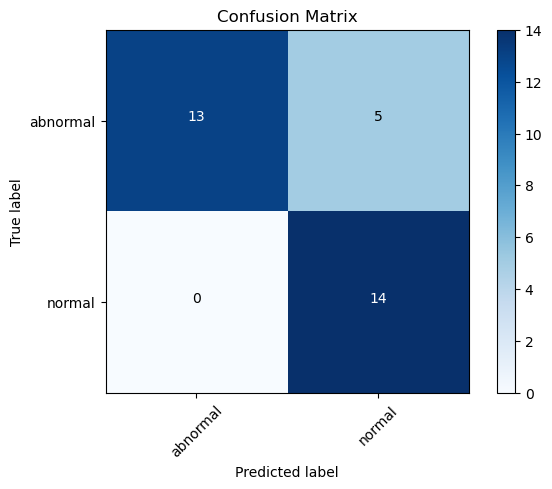

In [18]:
cm_plot_labels = ['abnormal', 'normal']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')